<a href="https://colab.research.google.com/github/ReynaldiJ/portfolio/blob/main/SVC_with_Grid_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer

In [ ]:
#read data
cancer = load_breast_cancer()
print(cancer['DESCR'])

In [ ]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
df_raw = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
pd.DataFrame(cancer['target'], columns = ['Target'])

,Target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [ ]:
cancer['target'].sum()

357

In [ ]:
df_raw['Cancer'] = pd.DataFrame(cancer['target'])
df_raw.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
np.sum(pd.isnull(df_raw.sum()))

0

In [ ]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<Axes: xlabel='Cancer', ylabel='count'>

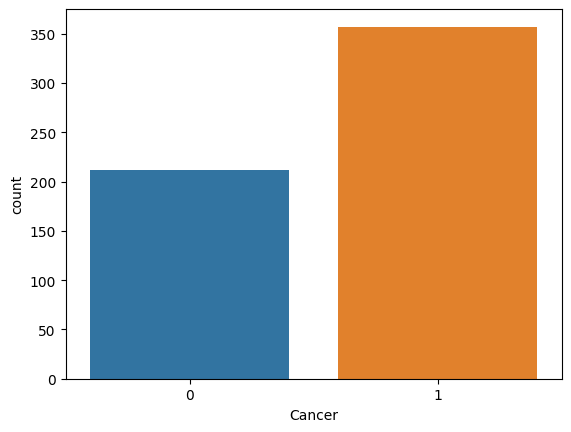

In [ ]:
#Exploration

sns.countplot(x='Cancer', data = df)

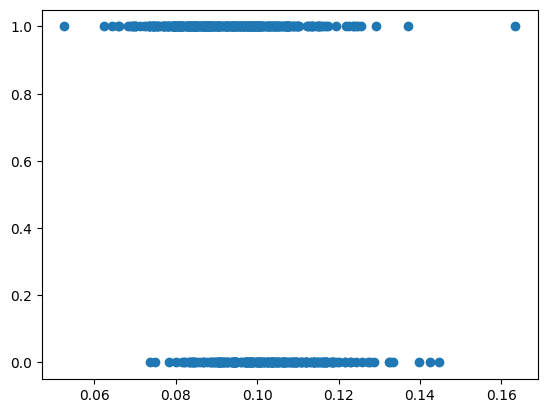

In [ ]:
plt.scatter(x = 'mean smoothness', y = 'Cancer', data = df)

In [ ]:
cols = cancer['feature_names']

for i, col in enumerate(cols):
  sns.boxplot(x = df['Cancer'], y = df[col])
  plt.figure()

In [ ]:
#split data
from sklearn.model_selection import train_test_split as tts

df_feature = df.drop('Cancer', axis = 1)
df_target = df['Cancer']
x_train, x_test, y_train, y_test = tts(df_feature,
                                       df_target,
                                       test_size = 0.3,
                                       random_state = 99)

In [ ]:
#check data
print("x_train : ", len(x_train))
print("x_test : ", len(x_test))
print("y_train : ", len(y_train))
print("y_test : ", len(y_test))

x_train :  398
x_test :  171
y_train :  398
y_test :  171


In [ ]:
#train model
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)

SVC()

In [ ]:
#evaluation
from sklearn.metrics import classification_report, confusion_matrix

prediction = model.predict(x_test)
print(confusion_matrix(y_test, prediction))
print()
print(classification_report(y_test, prediction))

[[ 44  14]
 [  0 113]]

              precision    recall  f1-score   support

           0       1.00      0.76      0.86        58
           1       0.89      1.00      0.94       113

    accuracy                           0.92       171
   macro avg       0.94      0.88      0.90       171
weighted avg       0.93      0.92      0.91       171



In [ ]:
#hyperparameter tunning (grid search)

from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1, 1, 10, 100],
             'gamma':[0.01, 0.1, 1, 10],
             'kernel':['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['rbf']},
             verbose=1)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)


In [ ]:
#evaluation
from sklearn.metrics import classification_report, confusion_matrix

grid_prediction = grid.predict(x_test)
print(confusion_matrix(y_test, grid_prediction))
print()
print(classification_report(y_test, grid_prediction))

[[  2  56]
 [  2 111]]

              precision    recall  f1-score   support

           0       0.50      0.03      0.06        58
           1       0.66      0.98      0.79       113

    accuracy                           0.66       171
   macro avg       0.58      0.51      0.43       171
weighted avg       0.61      0.66      0.55       171

